# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.18


In [59]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

In [60]:
warnings.filterwarnings("ignore")

## Carregando os Dados

In [3]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [13]:
df_dsa['Categoria'].value_counts()

Categoria
Office Supplies    5851
Furniture          2055
Technology         1794
Name: count, dtype: int64

In [14]:
vendas_officeSupley = df_dsa[df_dsa['Categoria'] == 'Office Supplies']
vendas_officeSupley

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.620
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.368
6,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AR-10002833,Office Supplies,Art,7.280
8,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-BI-10003910,Office Supplies,Binders,18.504
9,CA-2015-115812,09/06/2015,BH-11710,Consumer,United States,Los Angeles,California,OFF-AP-10002892,Office Supplies,Appliances,114.900
...,...,...,...,...,...,...,...,...,...,...,...
9693,CA-2015-144281,10/06/2015,HK-14890,Corporate,United States,Detroit,Michigan,OFF-LA-10003930,Office Supplies,Labels,491.550
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620


In [15]:
vendas_officeSupley[['Cidade', 'Valor_Venda']].groupby(['Cidade']).sum().sort_values(by='Valor_Venda', ascending=False)


,Valor_Venda
Cidade,
New York City,68362.814
Los Angeles,47098.100
San Francisco,41771.198
Seattle,34856.878
Philadelphia,29313.687
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


In [16]:
vendas_officeSupley[['Cidade', 'Valor_Venda']].groupby(['Cidade']).sum().idxmax()

Valor_Venda    New York City
dtype: object

Portanto a Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies' é *New York City*

## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

In [17]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], dayfirst = True)

In [18]:
df_dsa.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [19]:
vendas_porData = df_dsa[['Data_Pedido', 'Valor_Venda']].groupby(['Data_Pedido']).sum().reset_index()

vendas_porData

,Data_Pedido,Valor_Venda
0,2015-01-03,16.4480
1,2015-01-04,288.0600
2,2015-01-05,19.5360
3,2015-01-06,4407.1000
4,2015-01-07,87.1580
...,...,...
1221,2018-12-26,814.5940
1222,2018-12-27,177.6360
1223,2018-12-28,1657.3508
1224,2018-12-29,2915.5340


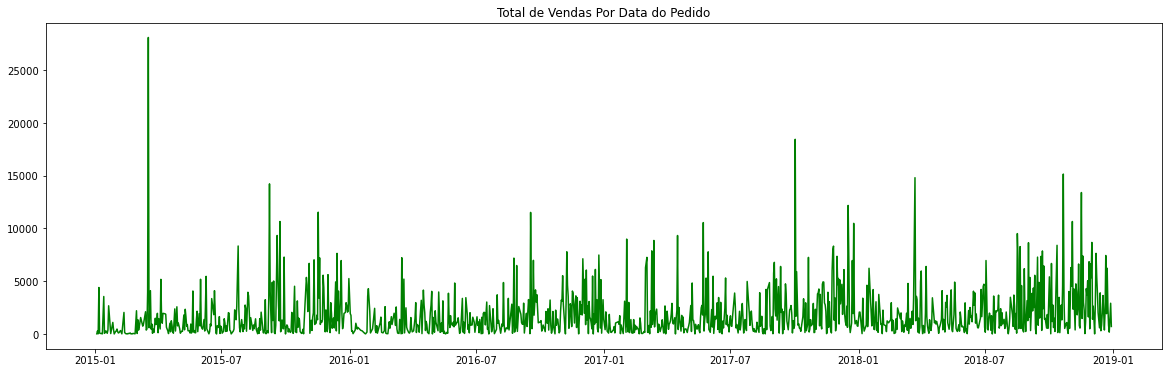

In [20]:
plt.figure(figsize=(20, 6))
plt.plot(vendas_porData['Data_Pedido'], vendas_porData['Valor_Venda'], color='green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [21]:
vendas_porEstado = df_dsa[['Estado', 'Valor_Venda']].groupby(['Estado']).sum().reset_index()
vendas_porEstado

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980
5,Connecticut,13366.7370
6,Delaware,26452.5890
7,District of Columbia,2865.0200
8,Florida,88043.7000
9,Georgia,48083.1600


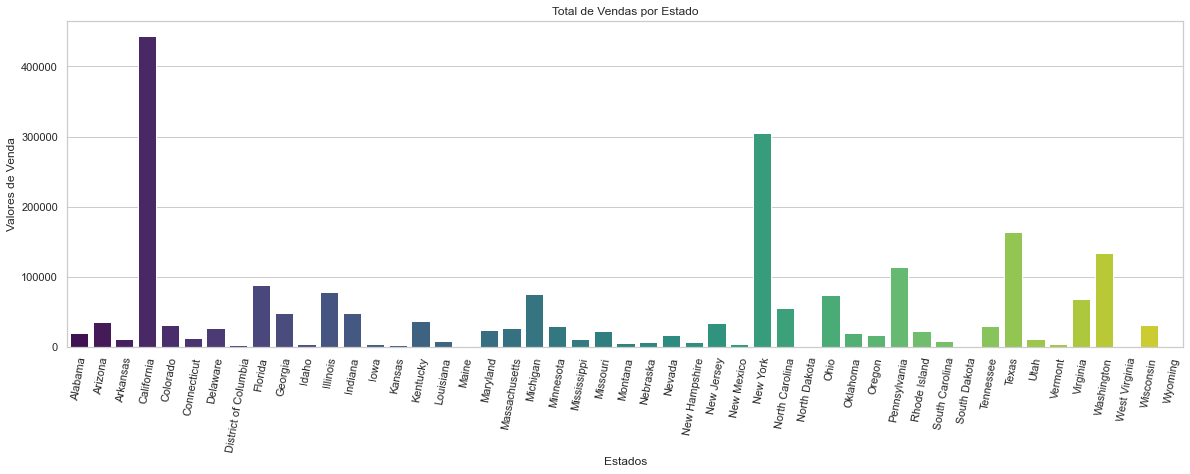

In [22]:
# Configurar o estilo do Seaborn (opcional)
sns.set(style="whitegrid")

# Plotar o gráfico de barras
plt.figure(figsize=(20, 6))
sns.barplot(x='Estado', y='Valor_Venda', data=vendas_porEstado, palette="viridis")

# Adicionar rótulos e título
plt.xlabel('Estados')
plt.ylabel('Valores de Venda')
plt.title('Total de Vendas por Estado')
plt.xticks(rotation = 80)

# Exibir o gráfico
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [23]:
vendas_porCidades = df_dsa[['Cidade', 'Valor_Venda']].groupby(['Cidade']).sum().sort_values(by='Valor_Venda', ascending=False).reset_index()
maiores_Cidades = vendas_porCidades.head(10)
maiores_Cidades

,Cidade,Valor_Venda
0,New York City,251749.2190
1,Los Angeles,171654.6330
2,Seattle,114725.4780
3,San Francisco,107489.9520
4,Philadelphia,107197.8030
5,Houston,61590.1868
6,San Diego,47458.3790
7,Chicago,46974.3430
8,Jacksonville,44713.1830
9,Detroit,42446.9440


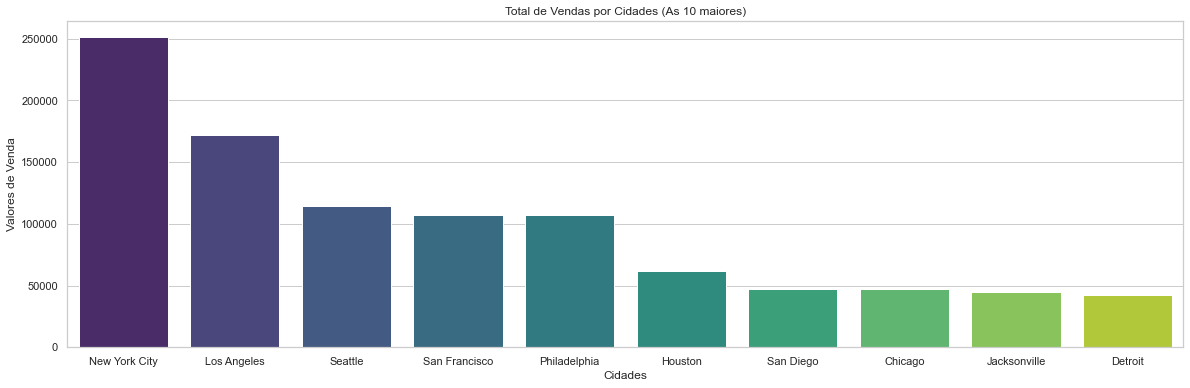

In [24]:
sns.set(style="whitegrid")

# Plotar o gráfico de barras
plt.figure(figsize=(20, 6))
sns.barplot(x='Cidade', y='Valor_Venda', data=maiores_Cidades, palette="viridis")

# Adicionar rótulos e título
plt.xlabel('Cidades')
plt.ylabel('Valores de Venda')
plt.title('Total de Vendas por Cidades (As 10 maiores)')

# Exibir o gráfico
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [25]:
vendas_porSegmento = df_dsa[['Segmento', 'Valor_Venda']].groupby(['Segmento']).sum().sort_values(by='Valor_Venda', ascending=False).reset_index()
vendas_porSegmento


,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [26]:
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

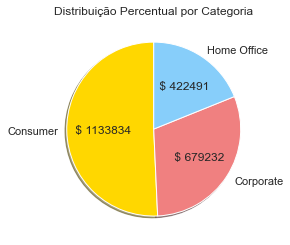

In [27]:
# Dados para o gráfico
labels = ['Categoria A', 'Categoria B', 'Categoria C'] 
sizes = [25, 30, 15, 30]

# Cores para cada fatia
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

# Criar o gráfico de pizza
plt.pie(vendas_porSegmento['Valor_Venda'], labels = vendas_porSegmento['Segmento'], autopct = autopct_format(vendas_porSegmento['Valor_Venda']), colors=colors, shadow=True, startangle=90)

# Adicionar título
plt.title('Distribuição Percentual por Categoria')

# Exibir o gráfico
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [28]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


Iremos criar uma coluna chamada "ano", para isso temos que converter a coluna data para datetime, ação que ja foi feita no desafio anterior.

In [29]:
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.strftime('%y')

In [30]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,17
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,17
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,17
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,16
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,16


In [31]:
vendas_Ano = df_dsa[['Segmento','Valor_Venda','Ano']].groupby(['Ano','Segmento']).sum()
vendas_Ano

Valor_Venda
Ano Segmento                
15  Consumer     256719.9166
    Corporate    125819.5957
    Home Office   88229.0878
16  Consumer     265295.2593
    Corporate    114643.1229
    Home Office   74134.1332
17  Consumer     288459.5572
    Corporate    203266.7398
    Home Office  103639.6270
18  Consumer     323359.6019
    Corporate    235502.7284
    Home Office  156488.5849

## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [32]:
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15,0.10)

In [33]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,17,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,17,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,17,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,16,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,16,0.1


In [34]:
df_dsa['Desconto'].value_counts()

Desconto
0.10    9243
0.15     457
Name: count, dtype: int64

In [1]:
print('No Total 457 Vendas Receberiam Desconto de 15%.')

No Total 457 Vendas Receberiam Desconto de 15%.


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

Média do valor de vendas dos produtos acima de 1000 antes dos descontos:

In [35]:
valor_antes_desconto = df_dsa[df_dsa['Valor_Venda'] > 1000]
round(valor_antes_desconto['Valor_Venda'].mean(), 2)

2116.81

In [36]:
df_dsa['valor_comDesconto'] = np.where(df_dsa['Valor_Venda'] > 1000, df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda']*0.15), df_dsa['Valor_Venda'] - (df_dsa['Valor_Venda'] * 0.10))
df_dsa['valor_comDesconto']

0       235.76400
1       658.74600
2        13.15800
3       861.81975
4        20.13120
          ...    
9695     20.54700
9696     48.88800
9697    177.09840
9698      3.25800
9699     10.38600
Name: valor_comDesconto, Length: 9700, dtype: float64

In [37]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,valor_comDesconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,17,0.1,235.76400
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,17,0.1,658.74600
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,17,0.1,13.15800
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,16,0.1,861.81975
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,16,0.1,20.13120


In [38]:
valor_com_desconto = df_dsa[df_dsa['Valor_Venda'] > 1000]
round(valor_com_desconto['valor_comDesconto'].mean(), 2)

1799.29

## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

In [39]:
df_dsa['mes'] = df_dsa['Data_Pedido'].dt.strftime('%m')

In [40]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,valor_comDesconto,mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,17,0.1,235.76400,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,17,0.1,658.74600,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,17,0.1,13.15800,06
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,16,0.1,861.81975,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,16,0.1,20.13120,10


In [41]:
media_ano = df_dsa[['Ano','mes','Segmento','Valor_Venda']].groupby(['Ano','mes','Segmento']).mean()
media_ano

Valor_Venda
Ano mes Segmento                
15  01  Consumer      146.736787
        Corporate     130.886769
        Home Office   329.855882
    02  Consumer      117.327926
        Corporate      69.235333
...                          ...
18  11  Corporate     341.215278
        Home Office   247.519423
    12  Consumer      183.616244
        Corporate     153.167403
        Home Office   224.523983

[144 rows x 1 columns]

In [56]:
# Vamos extrair os níveis
anos = media_ano.index.get_level_values(0)
meses = media_ano.index.get_level_values(1)
segmentos = media_ano.index.get_level_values(2)


Segmento
Consumer       48
Corporate      48
Home Office    48
Name: count, dtype: int64

<Figure size 864x432 with 0 Axes>

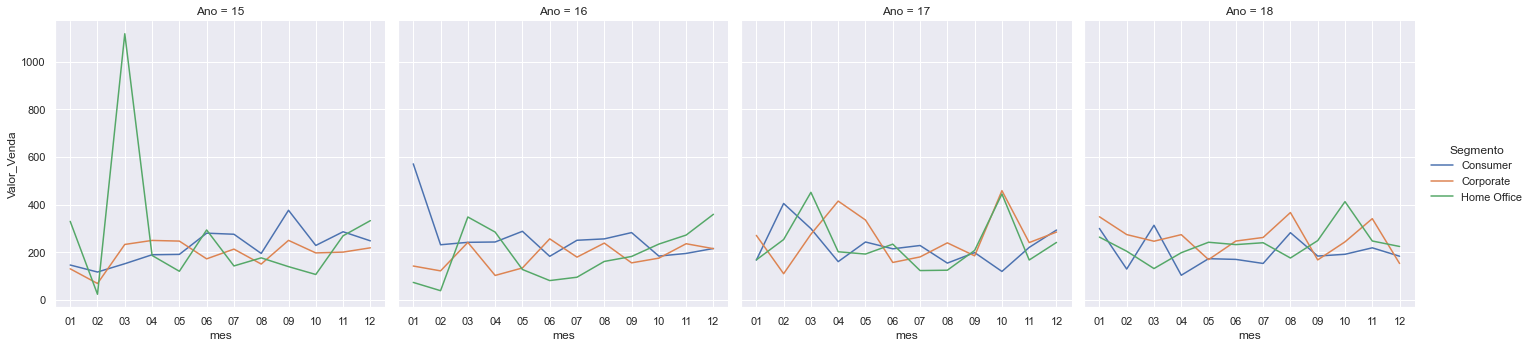

In [61]:
# Plot
plt.figure(figsize = (12, 6))
sns.set() # é usado para limpar a peleta de cores

# relplot cria um gráfico de relação entre diversas variáveis
fig1 = sns.relplot(kind = 'line',
                   data = media_ano, 
                   y = 'Valor_Venda', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)
plt.show()

## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [136]:
total_sub_categorias = df_dsa[['Categoria','SubCategoria','Valor_Venda']].groupby(['Categoria','SubCategoria']).sum().sort_values('Valor_Venda', ascending = False).head(12)
total_sub_categorias

Valor_Venda
Categoria       SubCategoria             
Technology      Phones        325271.2940
Furniture       Chairs        317919.6250
Office Supplies Storage       216188.3620
Furniture       Tables        202083.3600
Office Supplies Binders       194723.3810
Technology      Machines      189238.6310
                Accessories   162791.3620
                Copiers       146248.0940
Furniture       Bookcases     108045.0467
Office Supplies Appliances    104061.6930
Furniture       Furnishings    88862.7700
Office Supplies Paper          76312.7640

In [138]:
total_sub_categorias = total_sub_categorias[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

In [139]:
total_sub_categorias

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [141]:
total_categorias = total_sub_categorias[['Categoria','Valor_Venda']].groupby(['Categoria']).sum().astype(int).reset_index()
total_categorias

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [142]:
# Listas de cores para categorias
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

In [143]:
# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

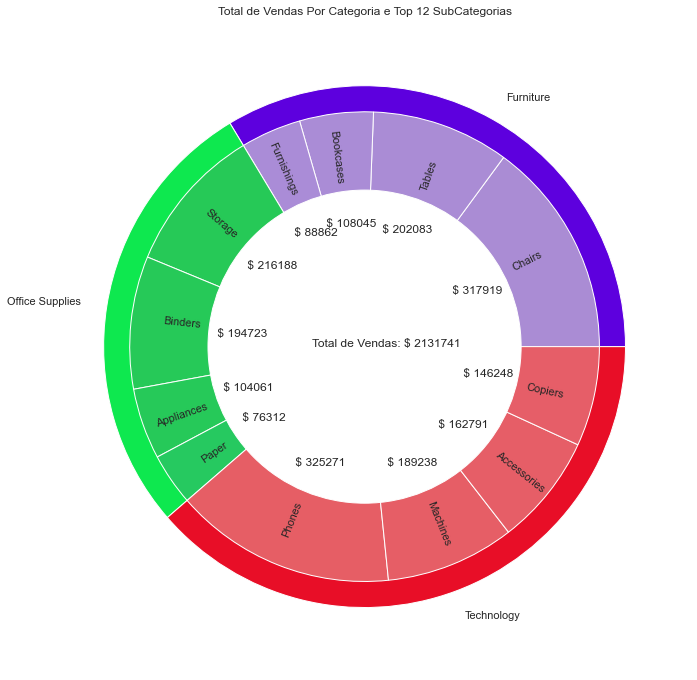

In [144]:
# Plot

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(total_categorias['Valor_Venda'], 
            radius = 1,
            labels = total_categorias['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(total_sub_categorias['Valor_Venda'],
            radius = 0.9,
            labels = total_sub_categorias['SubCategoria'],
            autopct = autopct_format(total_sub_categorias['Valor_Venda']),
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(total_sub_categorias['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

# Fim